# `find_trapped_clusters`
This is meant to find regions of defending phase that are trapped during an invasion simulation. It works for both ordinary and invasion percolation type simulations.

In [10]:
import matplotlib.pyplot as plt
import numpy as np

import porespy as ps

ps.visualization.set_mpl_style()

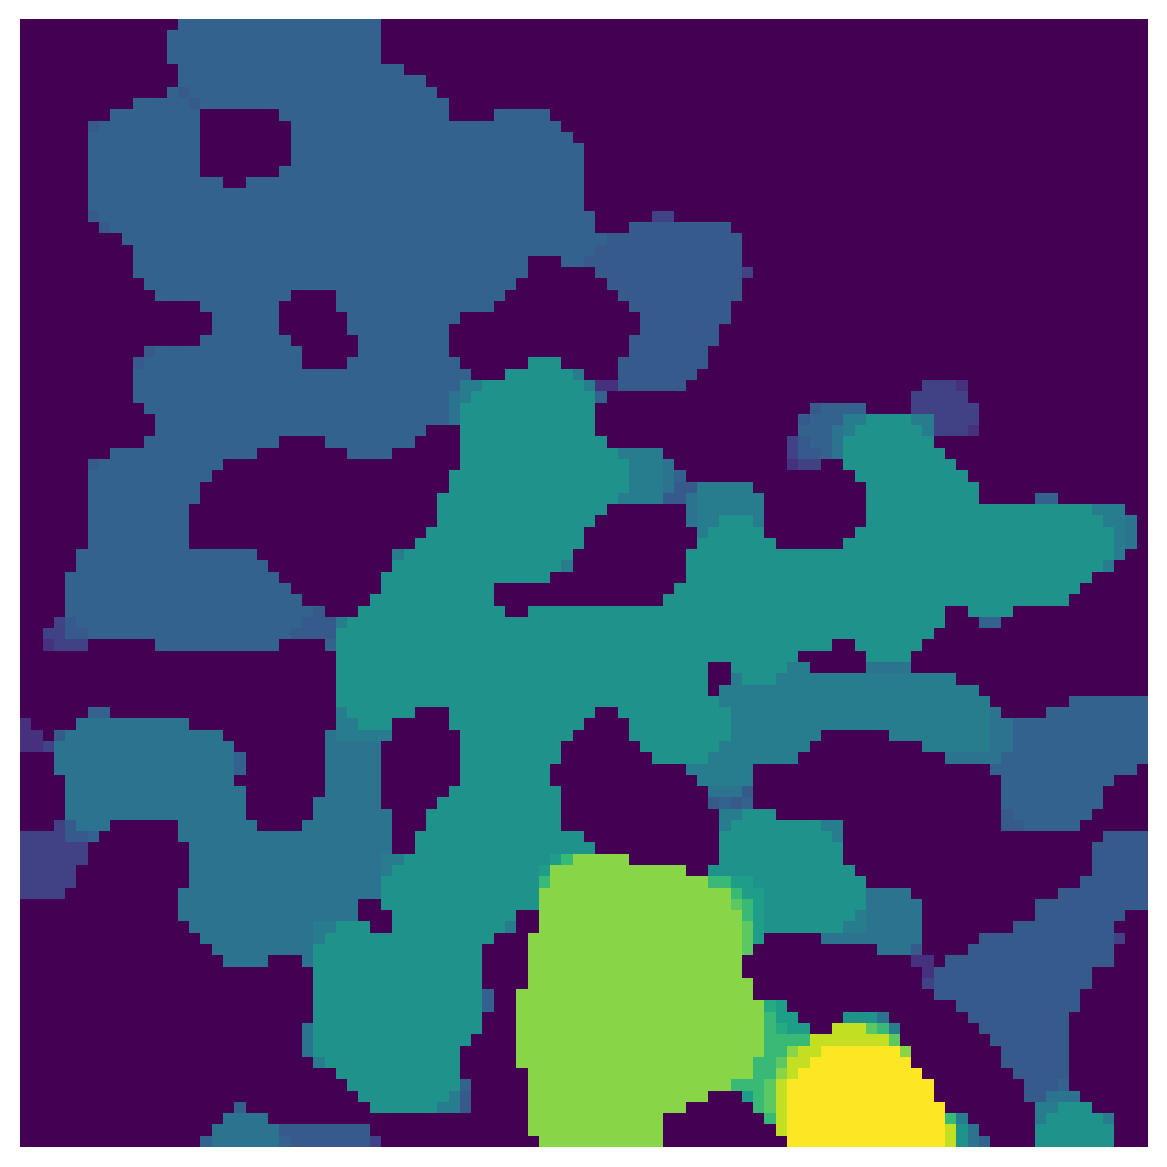

In [11]:
im = ps.generators.blobs(shape=[100, 100], porosity=0.6, seed=7)
inlets = np.zeros_like(im)
inlets[0, :] = True
sizes = ps.filters.porosimetry(im, inlets=inlets)
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(sizes, interpolation='none', origin='lower')
ax.axis(False);

## `seq`
Given the sequence at which each voxel was invaded, this finds all voxels that were invaded after they were cutoff from the outlet.  The output of ``porosimetry`` however is in the reverse order, since the largest sizes are invaded first.  PoreSpy has a function for this, called ``size_to_seq``:

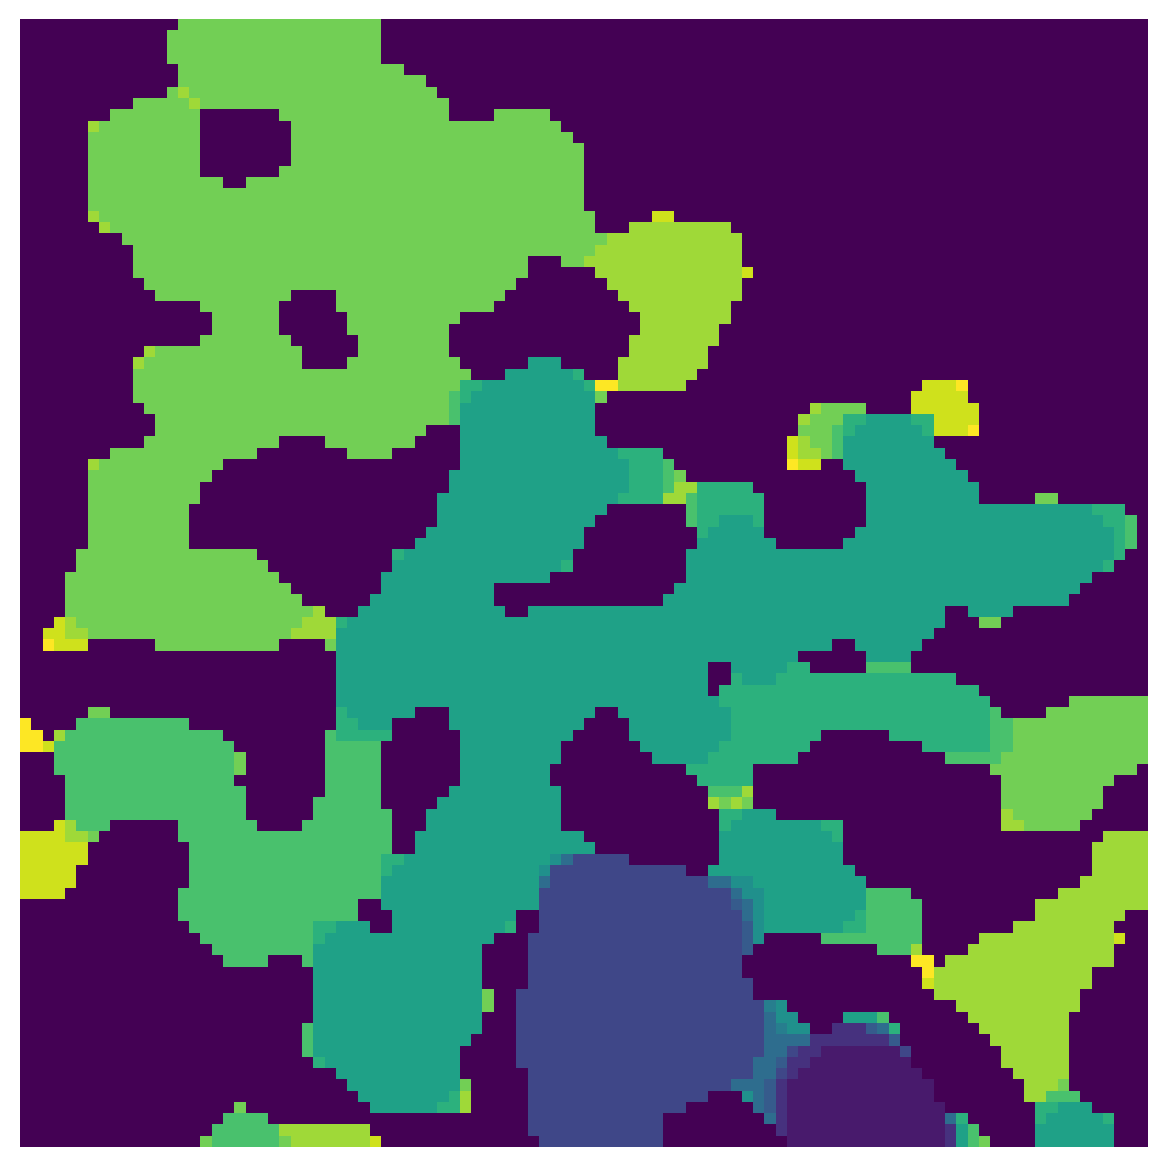

In [12]:
seq = ps.filters.size_to_seq(sizes)
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(seq, interpolation='none', origin='lower')
ax.axis(False);

Now we can pass this result into ``find_trapped_regions``:

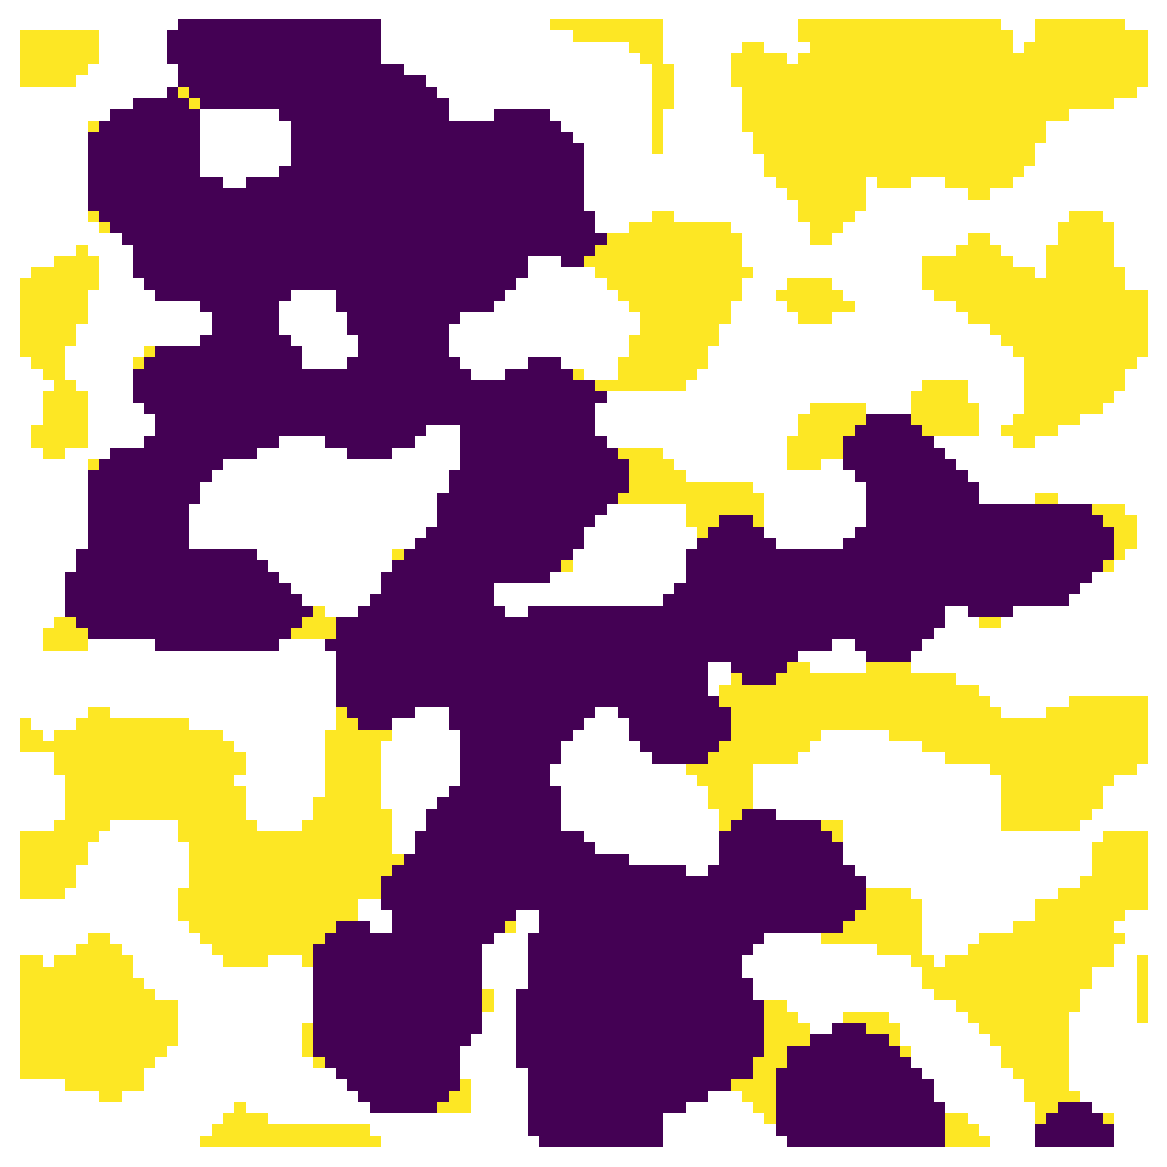

In [13]:
outlets = np.zeros_like(im)
outlets[-1, :] = True
trapped = ps.filters.find_trapped_clusters(
    im=im, seq=seq, outlets=outlets)
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(trapped/im, interpolation='none', origin='lower')
ax.axis(False);

In the above image the trapped regions are indicated by ``True``, so this can be used as a mask to remove invading voxels from the invasion image.

## `outlets`
It's possible to specify the which voxels are treated as the outlets.  If the outlets were on the right we'd see the following:

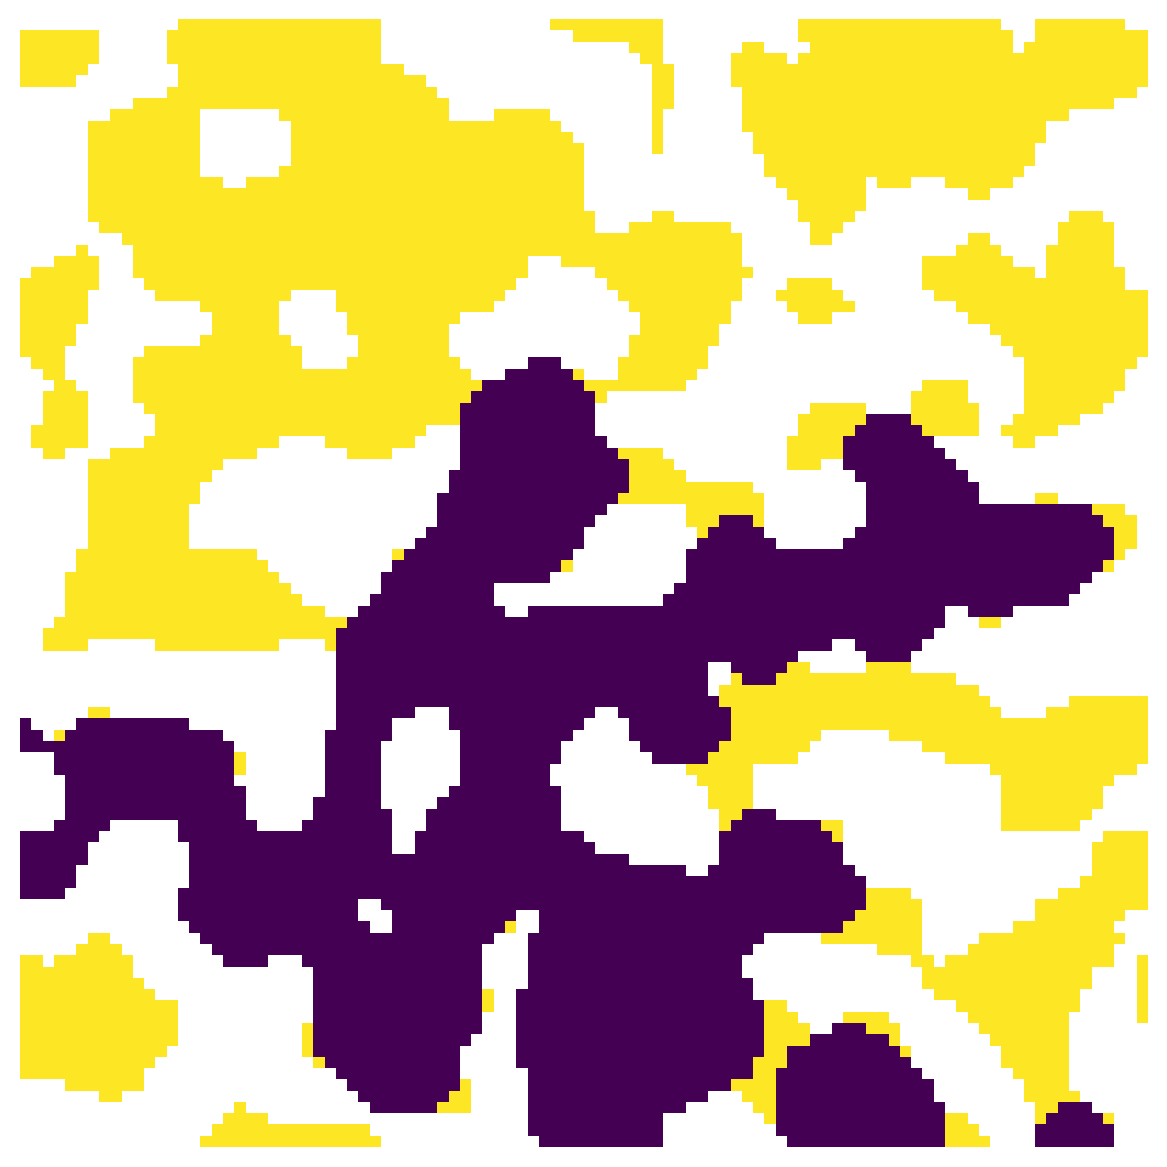

In [14]:
outlets = np.zeros_like(im)
outlets[:, 0] = True
trapped = ps.filters.find_trapped_clusters(
    im=im, seq=seq, outlets=outlets)
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(trapped/im, interpolation='none', origin='lower')
ax.axis(False);

## `method`

There are two options for this argument: `'labels'` and `'queue'`.  The former is best used for invasion sequences which were produced via `ibop` algorithms, while the latter is necessary for output from `ibip` or `qbip`.  

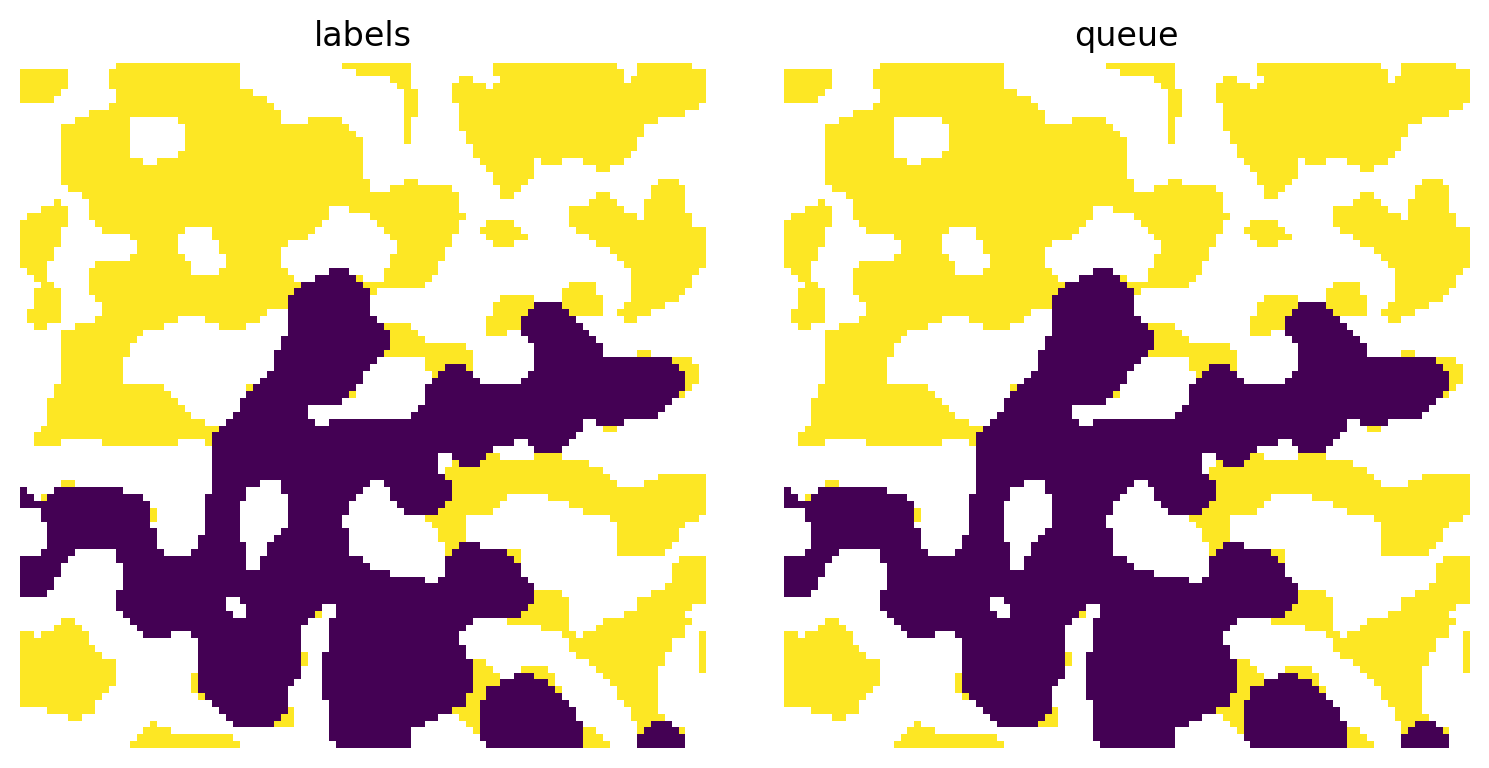

In [15]:
trapped1 = ps.filters.find_trapped_clusters(
    im=im, seq=seq, outlets=outlets, method='labels')
trapped2 = ps.filters.find_trapped_clusters(
    im=im, seq=seq, outlets=outlets, method='queue')
fig, ax = plt.subplots(1, 2, figsize=[8, 4])
ax[0].imshow(trapped1/im, interpolation='none', origin='lower')
ax[0].axis(False)
ax[0].set_title('labels')
ax[1].imshow(trapped2/im, interpolation='none', origin='lower')
ax[1].axis(False)
ax[1].set_title('queue');